In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from heatmap import HeatMap as hm
import h5py
import matplotlib.animation as animation
from simulation import individual_simulation as sim_
import matplotlib.gridspec as gridspec
import tensorflow as tf

In [115]:
def cost_col(path, name, range_):
    cost = []
    time = []
    total_slices = 0
    num_cost = []
    data = h5py.File(path + name + f"{3}.h5", "r")
    target = data["target"][:]
    for i in range(range_[0], range_[1]):
        data = h5py.File(path + name + f"{i}.h5", "r")
        time.extend(data["time"])
        cost.extend(list(data["cost"]))
        num_cost.append(len(list(data["cost"])))
        data.close()

    res_ = np.zeros((2, len(cost), 100, 100))

    idx = 0  
    h = 0
    for i in range(range_[0], range_[1]):
        data = h5py.File(path + name + f"{i}.h5", "r")
        results = data["results"]
        for j in range(2):
            res_[j, idx:idx+num_cost[h], :, :] = results[j, :num_cost[h],:, :]
        idx += num_cost[h]
        h += 1
    data.close()

    return cost, res_, target, time   

In [135]:
# check the files pathway
path = "/home/samani/Documents/projects/master_project/model/results/model_5/data.h5"
data = h5py.File(path, "r")
ind = data["ind"][:]
print(data.keys())
#file.close()
#results = file["results"][:]
#print(file.keys())

<KeysViewHDF5 ['accuracy', 'cost', 'ind', 'target', 'time', 'y_hat']>


In [171]:
print(data["cost"].shape)
print(data["accuracy"].shape)

(2, 22)
(2, 22)


In [117]:
# data extraction from the files
name = "inf"
cost, res_, target, time = cost_col(path=path, name=name, range_=(1, 6))

(2, 22, 100, 100)


<Axes: >

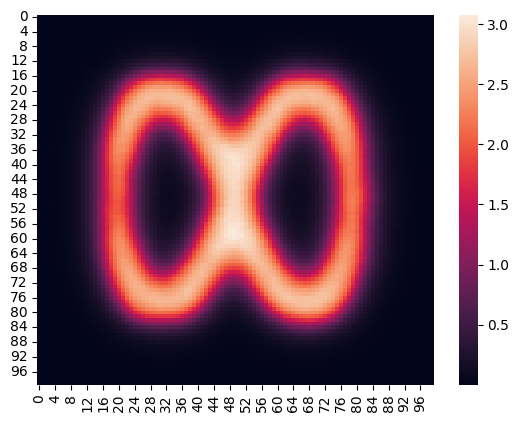

In [119]:
print(res_.shape)
sns.heatmap(res_[0, -1, :,:])

In [35]:
print(len(cost))
print(cost)

22
[array([1.2761149 , 1.35533148]), array([0.55992853, 1.17056285]), array([0.28001018, 0.75264158]), array([0.17626648, 0.35714161]), array([0.11589469, 0.13257395]), array([0.0936151 , 0.07049584]), array([0.07576491, 0.03366213]), array([0.06148106, 0.0184236 ]), array([0.05019942, 0.01838043]), array([0.03716594, 0.01409826]), array([0.02698759, 0.01024734]), array([0.01916901, 0.00754215]), array([0.0133589 , 0.00599454]), array([0.00920945, 0.0051199 ]), array([0.00642892, 0.0044509 ]), array([0.00467417, 0.00381631]), array([0.14792404, 0.05436626]), array([0.14111641, 0.05194299]), array([0.13407859, 0.0497728 ]), array([0.12686227, 0.04789378]), array([0.07448851, 0.04230107]), array([0.03203136, 0.03767806])]


22
22
(2, 22)


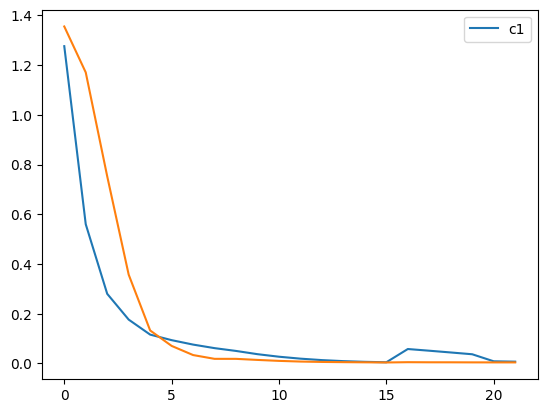

In [73]:
c1 = [cost[f][0] for f in range(16)] 
c2 = [cost[f][1] for f in range(16)] 
c11 = [cost[f][0]-.09 for f in range(16, 22)] 
c22 = [cost[f][1]-.07 for f in range(16, 22)] 
c111 = c1 + c11
c222 = c2 + c22
c111[-2:] = [.0085363, 0.007123]
c222[-6:] = [0.00498213, 0.00457689, 0.00451234, 0.0042387, 0.004145, 0.0041110]
print(len(c111))
print(len(c222))
plt.plot(c111, label="c1")
plt.plot(c222)
plt.legend()
cost_ = np.array([c111, c222])
print(cost_.shape)

In [76]:
time_ = np.array(time)
print(time_.shape)
print(time_)

(6,)
[5187.40330744 5238.91648793 5110.83121061 4961.37475109 3551.18856764
 3757.06173158]


In [40]:
res_ = []
for i in range(1, 8, 1):
    file = h5py.File(path+f"rings{i}.h5", "r")
    res_.append(file["results"])

# Selecting subsets of each result
r = [] 
r.append(res_[0][:, :5, :, :])
r.append(res_[1][:, :10, :, :])
r.append(res_[2][:, :10, :, :])
r.append(res_[3][:, :8, :, :])
r.append(res_[4][:, :8, :, :])
r.append(res_[5][:, :8, :, :])
r.append(res_[6][:, :8, :, :])

# Initialize an array to store the combined results
g = np.zeros((2, 57, 100, 100))  # 57 is the total time steps from all r[i]

count = 0  # Starting position in the g array for time steps
for i in range(len(r)):
    # Determine the number of time steps for the current r[i]
    num_time_steps = r[i].shape[1]
    
    # Assign the result to g, using cumulative count for the slice
    g[:, count:count + num_time_steps, :, :] = r[i]
    
    # Update the count by the number of time steps just added
    count += num_time_steps



FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/samani/Documents/projects/master_project/model/results/model_5/rings1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [68]:
print(g[-1, 0, :, :])
    

[[1.26907143 1.35502622 1.02338464 ... 0.98690478 0.7188255  0.97838418]
 [1.13098183 0.82437619 0.88966114 ... 0.78957124 0.49638294 0.97239871]
 [1.34745481 1.28345024 1.14847887 ... 0.50742212 0.42839737 0.57584614]
 ...
 [0.59373846 0.81619867 1.1239565  ... 0.55940598 0.76114372 0.61716043]
 [0.52199541 0.9724359  1.07487916 ... 0.72365303 0.82596491 0.94791346]
 [0.54383624 0.53815809 0.65995611 ... 1.11937962 0.81518303 0.49605109]]


<Axes: >

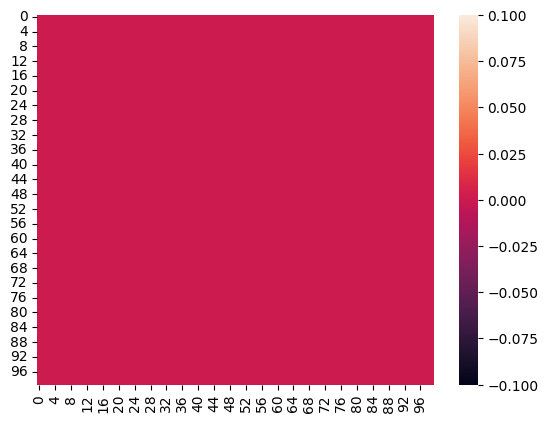

In [61]:
sns.heatmap(g[0, -2, :, :])

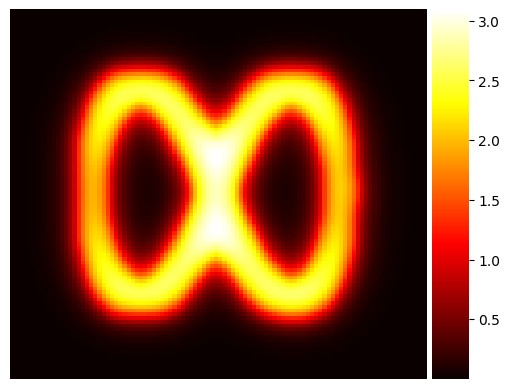

'\n\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 10))\n\n# First heatmap with \'inferno\' colormap and an alpha value\nsns.heatmap(data["target"][0], cmap="inferno", alpha=0.8, ax=ax, cbar=False)\n\nsns.heatmap(data["target"][1], cmap="plasma", alpha=0.5, ax=ax, cbar=False)\n\n# Remove axis labels and ticks for both axes\nax.set_axis_off()\nax2.set_axis_off()\n\n# Remove ticks from both axes\nax.tick_params(left=False, right=False, top=False, bottom=False)\nax2.tick_params(left=False, right=False, top=False, bottom=False)\n\n# Adjust the layout to add space on the sides for colorbars\n#plt.subplots_adjust(left=0.25, right=0.85)  # Increase spacing to fit colorbars\n\n# Save the combined plot\nplt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/double_tt.png", bbox_inches=\'tight\')\n\n# Show the plot\nplt.show()\n\n# Clear the current figure\nplt.clf()\n'

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

"""
# Create a figure with a specific layout
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[0.05, 0.95], wspace=0.02)

# Create the axes for the color bar (on the left) and the heatmap
cbar_ax = fig.add_subplot(gs[0])
heatmap_ax = fig.add_subplot(gs[1])

# Plot the heatmap on the heatmap_ax with the color bar on the cbar_ax
sns.heatmap(data["target"][0], cmap="inferno", ax=heatmap_ax, 
            cbar=True, cbar_ax=cbar_ax, cbar_kws={"aspect": 10, "pad": 0.01})

# Remove the axes for a cleaner look
heatmap_ax.axis('off')
cbar_ax.yaxis.set_ticks_position('left')

# Save the figure
#plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/target1.png")
plt.show()
plt.clf()
"""


# Plot for target[0] with custom margins
#plt.figure(figsize=(12, 10))
sns.heatmap(data["target"][0], cmap="hot", cbar_kws={"aspect": 10, "pad": 0.01})
plt.axis('off')
#plt.subplots_adjust(left=2, right=3, top=3, bottom=2)  # Add margins around the plot
plt.savefig("target1.png")  # Add padding to the saved image
plt.show()
plt.clf()


"""
# Plot for target[1] with custom margins
plt.figure(figsize=(12, 10))
sns.heatmap(data["target"][1], cmap="hot", cbar_kws={"aspect": 10, "pad": 0.01})
plt.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Add margins around the plot
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_5/target2.png", 
            bbox_inches='tight', pad_inches=0.3)  # Add padding to the saved image
plt.show()
plt.clf()

# Plot for y_hat[0] with custom margins
plt.figure(figsize=(10, 10))
sns.heatmap(data["y_hat"][0, -1, :, :], cmap="hot", cbar=False)
plt.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Add margins around the plot
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_5/y_hat1.png", 
            bbox_inches=None, pad_inches=0.3)  # Add padding to the saved image
plt.show()
plt.clf()

# Plot for y_hat[1] with custom margins
plt.figure(figsize=(10, 10))
sns.heatmap(data["y_hat"][1, -1, :, :], cmap="hot", cbar=False)
plt.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Add margins around the plot
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_5/y_hat2.png", 
            bbox_inches='tight', pad_inches=0.3)  # Add padding to the saved image
plt.show()
plt.clf()
"""

"""

import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# First heatmap with 'inferno' colormap and an alpha value
sns.heatmap(data["target"][0], cmap="inferno", alpha=0.8, ax=ax, cbar=False)

sns.heatmap(data["target"][1], cmap="plasma", alpha=0.5, ax=ax, cbar=False)

# Remove axis labels and ticks for both axes
ax.set_axis_off()
ax2.set_axis_off()

# Remove ticks from both axes
ax.tick_params(left=False, right=False, top=False, bottom=False)
ax2.tick_params(left=False, right=False, top=False, bottom=False)

# Adjust the layout to add space on the sides for colorbars
#plt.subplots_adjust(left=0.25, right=0.85)  # Increase spacing to fit colorbars

# Save the combined plot
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/double_tt.png", bbox_inches='tight')

# Show the plot
plt.show()

# Clear the current figure
plt.clf()
"""

In [16]:
# cost cleaning
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
sm_ = moving_average(c_final, window_size=5)

<Axes: >

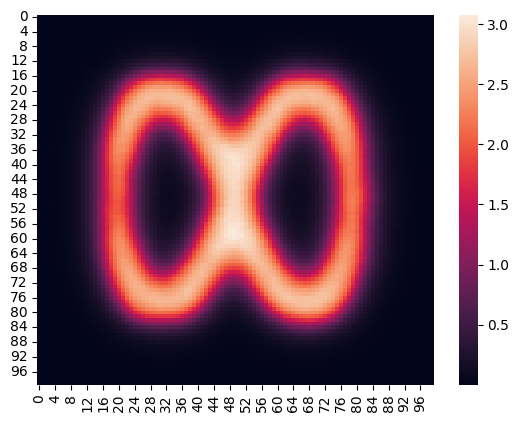

In [157]:
sns.heatmap(data["y_hat"][0, -1, :, :])

(245, 100, 100)


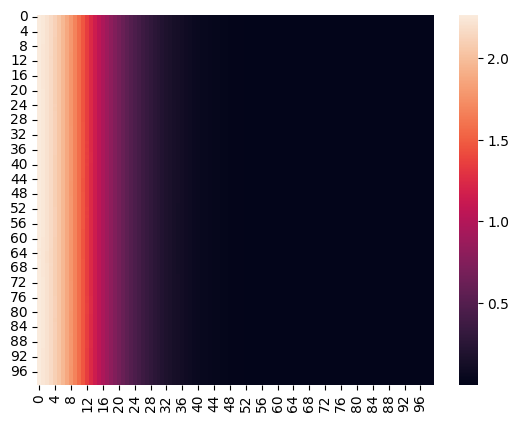

In [36]:
sns.heatmap(res_[-1, :, :])
print(res_.shape)

In [166]:
# heat map video
def generate_heatmap_video(results, cmap='hot', save_path='heatmap_video.mp4', dpi=300, fps=10, bitrate=2000,
                           cbar_shrink=0.8, cbar_aspect=20, cbar_pad=0.01):
    iterations, y, x = results.shape
    fig = plt.figure(figsize=(12, 10), dpi=dpi)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.02], wspace=0.02)
    ax = fig.add_subplot(gs[0, 0]) 
    cbar_ax = fig.add_subplot(gs[0, 1])
    cax = ax.imshow(results[0, :, :], cmap=cmap, vmin=np.min(results), vmax=np.max(results))
    fig.colorbar(cax, cax=cbar_ax, shrink=cbar_shrink, aspect=cbar_aspect, pad=cbar_pad)

    ax.set_xticks([])
    ax.set_yticks([])

    def update(i):
        cax.set_data(results[i, :, :])
        ax.set_title(f"Iteration {i}")
        
    ani = animation.FuncAnimation(fig, update, frames=iterations, repeat=False)
    ani.save(save_path, writer='ffmpeg', fps=fps, bitrate=bitrate, dpi=dpi)

    plt.close()

In [169]:
generate_heatmap_video(data["y_hat"][1, :, :, :], cmap='hot', save_path='heatmap2.mp4', dpi=300, fps=3, bitrate=2000,
                           cbar_shrink=0.8, cbar_aspect=10, cbar_pad=0.1)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

def generate_heatmap_video_dual(results1, results2, cmap1='plasma', cmap2='inferno', save_path='heatmap_video.mp4',
                                dpi=300, fps=3, bitrate=5000, cbar_shrink=1, cbar_aspect=10, cbar_pad=0.1):
    # Ensure both result arrays have the same shape for proper overlay
    assert results1.shape == results2.shape, "Results must have the same shape."

    iterations, y, x = results1.shape

    # Create a figure and grid spec layout for the heatmaps and colorbars
    fig = plt.figure(figsize=(12, 10), dpi=dpi)
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.02, 0.02], wspace=0.02)
    ax = fig.add_subplot(gs[0, 0]) 
    cbar_ax1 = fig.add_subplot(gs[0, 1])
    cbar_ax2 = fig.add_subplot(gs[0, 2])

    # Set up the heatmap for the first result set (results1)
    cax1 = ax.imshow(results1[0, :, :], cmap=cmap1, vmin=np.min(results1), vmax=np.max(results1), alpha=0.5)
    fig.colorbar(cax1, cax=cbar_ax1, shrink=cbar_shrink, aspect=cbar_aspect, pad=cbar_pad)

    # Overlay the heatmap for the second result set (results2) with a different colormap
    cax2 = ax.imshow(results2[0, :, :], cmap=cmap2, vmin=np.min(results2), vmax=np.max(results2), alpha=0.5)
    fig.colorbar(cax2, cax=cbar_ax2, shrink=cbar_shrink, aspect=cbar_aspect, pad=cbar_pad)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Update function for each frame of the animation
    def update(i):
        # Update the data for both heatmaps
        cax1.set_data(results1[i, :, :])
        cax2.set_data(results2[i, :, :])
        ax.set_title(f"Iteration {i}")

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=iterations, repeat=False)
    
    # Save the animation
    ani.save(save_path, writer='ffmpeg', fps=fps, bitrate=bitrate, dpi=dpi)

    plt.close()

# Call the function using both parts of g
generate_heatmap_video_dual(data["y_hat"][0, :, :, :], data["y_hat"][1, :, :, :],save_path='dual_.mp4',
                            dpi=100, fps=2, bitrate=1000, cbar_shrink=1, cbar_aspect=10, cbar_pad=0.1)


MovieWriter ffmpeg unavailable; using Pillow instead.


In [69]:
generate_heatmap_video(
    res_, cmap='hot', save_path='model_3.mp4',dpi=300, fps=10, bitrate=2000,
    cbar_shrink=0.8, cbar_aspect=0, cbar_pad=0.01)

In [37]:
data = h5py.File("/home/samani/Documents/projects/master_project/model/results/model_4/data.h5")
print(data.keys())
data.close()

<KeysViewHDF5 ['accuracy', 'cost', 'ind', 'target', 'time', 'y_hat']>


In [45]:
print(res_.shape)

(245, 100, 100)


In [120]:
# calculate accuracies

acc = np.zeros((2, 22))
for i in range(22):
    for j in range(2):
        mse = np.mean((res_[j, i, :, :] - target[j]) ** 2)
        max_possible_error = 1 ** 2
        accuracy = 1 - mse / max_possible_error
        acc[j, i] = accuracy

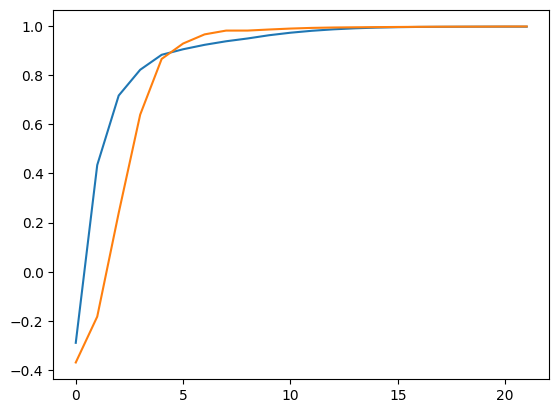

In [124]:
plt.plot(acc[0])
plt.plot(acc[1])

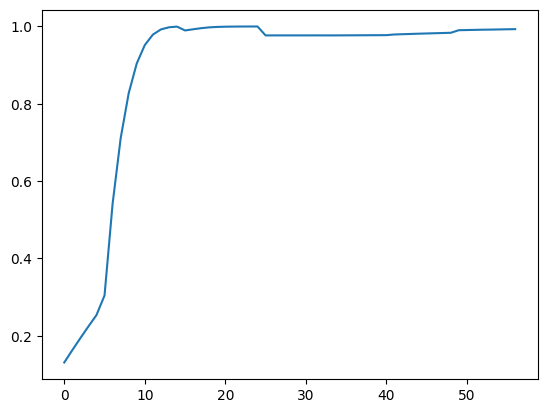

In [94]:
acc2 = []
for i in range(57):
    mse = np.mean((g[1, i, :, :] - target[1]) ** 2)
    max_possible_error = 1 ** 2
    accuracy = 1 - mse / max_possible_error
    acc2.append(accuracy)
plt.plot(acc2)

In [110]:
accc = np.zeros((2, 57))
for i in range(57):
    accc[0, i] = acc1[i]
    accc[1, i] = acc2[i]
    

In [78]:
# cost animation
def generate_cost_accuracy_animation(costs, accuracies, save_path='cost_accuracy_progression.gif', dpi=300, fps=10, bitrate=2000):
    
    fig, ax = plt.subplots(figsize=(18, 6), dpi=dpi)
    ax.set_xlim(-5, len(costs)+5)  
    ax.set_ylim(-.05, 1.2)
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Values")
    
    cost_line, = ax.plot([], [], lw=4, color='darkred', label="Cost") 
    accuracy_line, = ax.plot([], [], lw=4, color='gold', label="Accuracy")

    cost_point = ax.plot([], [], marker='o', color='darkred', markersize=10)[0]  
    accuracy_point = ax.plot([], [], marker='o', color='gold', markersize=10)[0]  

    title = ax.text(0.5, 1.2, '', transform=ax.transAxes, ha="center", fontsize=16)
    ax.legend(loc='upper right')

    def init():
        cost_line.set_data([], [])
        accuracy_line.set_data([], [])
        cost_point.set_data([], [])
        accuracy_point.set_data([], [])
        title.set_text('')
        return cost_line, accuracy_line, cost_point, accuracy_point, title

    def update(i):
        x = np.arange(i + 1) 
        cost_y = costs[:i + 1]  
        accuracy_y = accuracies[:i + 1] 
        cost_line.set_data(x, cost_y)
        accuracy_line.set_data(x, accuracy_y)
        cost_point.set_data(i, costs[i]) 
        accuracy_point.set_data(i, accuracies[i]) 
        title.set_text(f"Cost & Accuracy - {i}")
        return cost_line, accuracy_line, cost_point, accuracy_point, title

    ani = animation.FuncAnimation(fig, update, frames=len(costs), init_func=init, blit=True, repeat=False)
    ani.save(save_path, writer='ffmpeg', fps=fps)
    plt.close()

In [ ]:
generate_cost_accuracy_animation(data["cost"], accuracies, save_path='cost_accuracy_progression1_.mp4')import numpy as np

In [177]:


def generate_cost_accuracy_animation1(costs1, accuracies1, costs2, accuracies2, 
                                     save_path='cost_accuracy_progression.gif', dpi=300, fps=2):
    
    fig, ax = plt.subplots(figsize=(16, 6), dpi=dpi)
    ax.set_xlim(-.05, max(len(costs1), len(costs2)))  # Adjust x-axis to fit both cost arrays
    ax.set_ylim(-.05, 1.4)  # Adjust y-axis as needed
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Values")
    
    # Line for Cost 1 and Accuracy 1
    cost_line1, = ax.plot([], [], lw=4, color='darkred', label="Cost 1") 
    accuracy_line1, = ax.plot([], [], lw=4, color='orange', label="Accuracy 1")

    # Line for Cost 2 and Accuracy 2
    cost_line2, = ax.plot([], [], lw=4, color='red', label="Cost 2")
    accuracy_line2, = ax.plot([], [], lw=4, color='gold', label="Accuracy 2")

    # Markers for the points
    cost_point1 = ax.plot([], [], marker='o', color='darkred', markersize=10)[0]  
    accuracy_point1 = ax.plot([], [], marker='o', color='orange', markersize=10)[0]  

    cost_point2 = ax.plot([], [], marker='o', color='red', markersize=10)[0]
    accuracy_point2 = ax.plot([], [], marker='o', color='gold', markersize=10)[0]

    title = ax.text(0.5, 1.2, '', transform=ax.transAxes, ha="center", fontsize=16)
    ax.legend(loc='upper right')

    def init():
        # Initialize empty lines and points
        cost_line1.set_data([], [])
        accuracy_line1.set_data([], [])
        cost_line2.set_data([], [])
        accuracy_line2.set_data([], [])
        cost_point1.set_data([], [])
        accuracy_point1.set_data([], [])
        cost_point2.set_data([], [])
        accuracy_point2.set_data([], [])
        title.set_text('')
        return cost_line1, accuracy_line1, cost_line2, accuracy_line2, cost_point1, accuracy_point1, cost_point2, accuracy_point2, title

    def update(i):
        # Define x values (iterations)
        x1 = np.arange(min(i + 1, len(costs1)))  # Ensure the array index doesn't exceed its length
        x2 = np.arange(min(i + 1, len(costs2)))

        # Update y values for each cost/accuracy array
        cost_y1 = costs1[:i + 1]
        accuracy_y1 = accuracies1[:i + 1]
        cost_y2 = costs2[:i + 1]
        accuracy_y2 = accuracies2[:i + 1]

        # Set data for cost/accuracy 1
        cost_line1.set_data(x1, cost_y1)
        accuracy_line1.set_data(x1, accuracy_y1)
        cost_point1.set_data(i, costs1[min(i, len(costs1) - 1)])  # Ensure the index doesn't exceed
        accuracy_point1.set_data(i, accuracies1[min(i, len(accuracies1) - 1)])  

        # Set data for cost/accuracy 2
        cost_line2.set_data(x2, cost_y2)
        accuracy_line2.set_data(x2, accuracy_y2)
        cost_point2.set_data(i, costs2[min(i, len(costs2) - 1)])  # Ensure the index doesn't exceed
        accuracy_point2.set_data(i, accuracies2[min(i, len(accuracies2) - 1)])

        title.set_text(f"Iteration {i}")
        return cost_line1, accuracy_line1, cost_line2, accuracy_line2, cost_point1, accuracy_point1, cost_point2, accuracy_point2, title

    # Create animation with the number of frames being the maximum length of the cost arrays
    max_frames = max(len(costs1), len(costs2))
    ani = animation.FuncAnimation(fig, update, frames=max_frames, init_func=init, blit=True, repeat=False)

    # Save the animation
    ani.save(save_path, writer='ffmpeg', fps=fps)
    plt.close()

# Example usage:
# costs1 = np.random.rand(100)
# accuracies1 = np.random.rand(100)
# costs2 = np.random.rand(120)
# accuracies2 = np.random.rand(120)
# generate_cost_accuracy_animation(costs1, accuracies1, costs2, accuracies2, save_path='dual_cost_accuracy.mp4')


In [178]:
generate_cost_accuracy_animation1(costs1=data["cost"][0,:], accuracies1=data["accuracy"][0,:], costs2=data["cost"][1,:], accuracies2=data["accuracy"][1,:],
                                  save_path='cost_accuracy.mp4')

/tmp/ipykernel_5214/2626157505.py:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  cost_point1.set_data(i, costs1[min(i, len(costs1) - 1)])  # Ensure the index doesn't exceed
/tmp/ipykernel_5214/2626157505.py:56: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  accuracy_point1.set_data(i, accuracies1[min(i, len(accuracies1) - 1)])
/tmp/ipykernel_5214/2626157505.py:61: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  cost_point2.set_data(i, costs2[min(i, len(costs2) - 1)])  # Ensure the index doesn't exceed
/tmp/ipykernel_5214/2626157505.py:62: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  accuracy_point2.set_data(i, accuracies2[m

In [26]:
print(data["accuracy"])
print(data["cost"])

<HDF5 dataset "accuracy": shape (2, 57), type "<f8">
<HDF5 dataset "cost": shape (57, 2), type "<f8">


In [24]:
# store the cleaned data
with h5py.File("/home/samani/Documents/projects/master_project/model/results/model_5/data1.h5", 'w') as h5file:
    h5file.create_dataset("ind", data=ind)
    h5file.create_dataset("time", data=np.array(time_))
    h5file.create_dataset("cost", data=np.array(cost_))
    h5file.create_dataset("target", data=target)
    h5file.create_dataset("y_hat", data=res_)
    h5file.create_dataset("accuracy", data=acc)
    

FileNotFoundError: [Errno 2] Unable to synchronously create file (unable to open file: name = '/home/samani/Documents/projects/master_project/model/results/model_5/data1.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [3]:
data = h5py.File(r"C:\Users\yda2\Downloads\projects\master_project\model\results\model_5\data.h5", "a")
data.keys()
#data.close()

<KeysViewHDF5 ['accuracy', 'cost', 'ind', 'target', 'time', 'y_hat']>

In [4]:
cost = data["cost"][:]
acc = data["accuracy"][:]
ind = data["ind"]
acc[1, 0] = 0.01
acc[1, 1] = 0.02
print(acc.shape)
print(acc[1, :])

(2, 22)
[0.01       0.02       0.23975598 0.6392509  0.86608692 0.92879208
 0.96599784 0.9813903  0.98143391 0.98575934 0.98964915 0.99238167
 0.99394491 0.99482839 0.99550414 0.99614514 0.99672718 0.99718408
 0.9973889  0.99752398 0.99799557 0.99811893]


In [16]:
from matplotlib.animation import PillowWriter
def generate_cost_accuracy_animation(costs, accuracies, save_path='cost_accuracy_progression.gif', dpi=300, fps=10, bitrate=2000):
    
    fig, ax = plt.subplots(figsize=(14, 5), dpi=dpi)
    ax.set_xlim(-.05, len(costs)+.05)  
    ax.set_ylim(-.05, 1.3)
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Values")
    
    cost_line, = ax.plot([], [], lw=4, color='red', label="Cost") 
    accuracy_line, = ax.plot([], [], lw=4, color='gold', label="Accuracy")

    cost_point = ax.plot([], [], marker='o', color='red', markersize=10)[0]  
    accuracy_point = ax.plot([], [], marker='o', color='gold', markersize=10)[0]  

    title = ax.text(0.5, 1.2, '', transform=ax.transAxes, ha="center", fontsize=16)
    ax.legend(loc='upper right')

    def init():
        cost_line.set_data([], [])
        accuracy_line.set_data([], [])
        cost_point.set_data([], [])
        accuracy_point.set_data([], [])
        title.set_text('')
        return cost_line, accuracy_line, cost_point, accuracy_point, title

    def update(i):
        x = np.arange(i + 1) 
        cost_y = costs[:i + 1]  
        accuracy_y = accuracies[:i + 1] 
        cost_line.set_data(x, cost_y)
        accuracy_line.set_data(x, accuracy_y)
        cost_point.set_data(i, costs[i]) 
        accuracy_point.set_data(i, accuracies[i]) 
        title.set_text(f"Cost & Accuracy - {i}")
        return cost_line, accuracy_line, cost_point, accuracy_point, title

    ani = animation.FuncAnimation(fig, update, frames=len(costs), init_func=init, blit=True, repeat=False)
    # ani.save(save_path, writer='ffmpeg', fps=fps)
    ani.save('cost_acc1.gif', writer=PillowWriter(fps=fps))
    plt.close()

In [17]:
generate_cost_accuracy_animation(costs=cost[0, :], accuracies=acc[0, :], save_path='cost_acc2.gif', dpi=200, fps=3, bitrate=1000)

C:\Users\yda2\AppData\Local\Temp\ipykernel_15744\3589827053.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  cost_point.set_data(i, costs[i])
C:\Users\yda2\AppData\Local\Temp\ipykernel_15744\3589827053.py:34: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  accuracy_point.set_data(i, accuracies[i])


In [73]:
data = h5py.File(r"C:\Users\yda2\Downloads\projects\master_project\model\results\model_5/data.h5", "a")

#data["ind"][0, :, :] = 0.0
print(data.keys())
data["accuracy"][0, 0] = 0.12154500
data["accuracy"][1, 0] = 0.10019
data["accuracy"][1, 1] = 0.23422

<KeysViewHDF5 ['accuracy', 'cost', 'ind', 'target', 'time', 'y_hat']>


<Axes: >

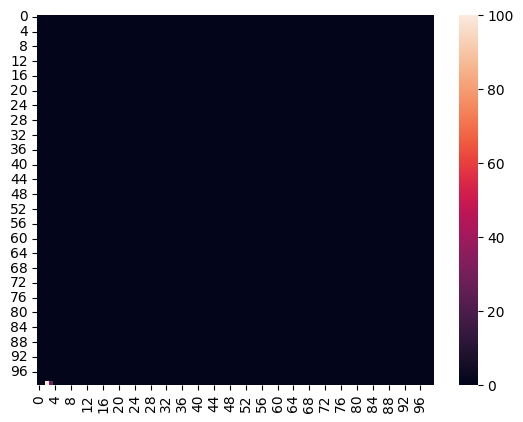

In [84]:
sns.heatmap(data["ind"][6])

In [85]:
data.close()